In [1]:

pip install import-ipynb


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import import_ipynb

from automata.fa.nfa import NFA
from visual_automata.fa.nfa import VisualNFA

nfa = VisualNFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'a', 'b'},
    transitions={
        'q0': {'a': {'q1'}},
        'q1': {'a': {'q1'}, '': {'q2'}},
        'q2': {'b': {'q0'}}
    },
    initial_state='q0',
    final_states={'q1'}
)

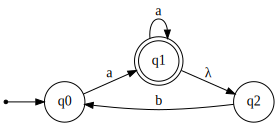

In [3]:
         nfa.show_diagram()


 ULD for 3 intervals via f3 = supULD(3)
f3.stateD[f3.init]= {2: 'u', 1: 'u'}

 tStr =  ['[1, 2, 3]', '[-3, -2, -1]']
f3.accept(tStr) = rejected

f3.accS([{1,2,3},{-1,-2,-3}]) = rejected
{0: {2: 'u', 1: 'u'}, 1: {2: 'l', 1: 'l'}, 2: {2: 'l', 1: 'u'}, 3: {2: 'u', 1: 'l'}, 4: {2: 'd', 1: 'l'}, 5: {2: 'd', 1: 'u'}, 6: {2: 'd', 1: 'd'}, 7: {2: 'l', 1: 'd'}, 8: {2: 'u', 1: 'd'}}


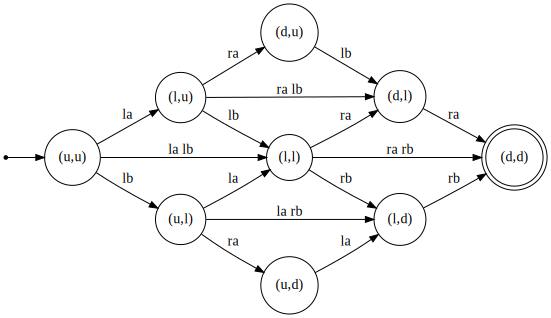

In [4]:
import import_ipynb

from automata.fa.nfa import NFA
from visual_automata.fa.nfa import VisualNFA
import supFA as sup



nfa = VisualNFA(
    states= { '(u,u)','(u,l)','(u,d)','(l,u)','(l,l)','(l,d)','(d,u)','(d,l)','(d,d)'},
    input_symbols={'la','lb','la lb','ra','rb','ra rb','la rb','ra lb'},  
    transitions={
        '(u,u)' : {'la': {'(l,u)'},'lb': {'(u,l)'},'la lb': {'(l,l)'}},
        '(u,l)' : {'la': {'(l,l)'},'ra': {'(u,d)'},'la rb': {'(l,d)'}},
        '(l,u)' : {'ra': {'(d,u)'},'lb': {'(l,l)'},'ra lb': {'(d,l)'}},
        '(l,l)' : {'ra': {'(d,l)'},'rb': {'(l,d)'},'ra rb': {'(d,d)'}},
        '(u,d)' : {'la': {'(l,d)'}},
        '(d,u)' : {'lb': {'(d,l)'}},
        '(l,d)' : {'rb': {'(d,d)'}},
        '(d,l)' : {'ra': {'(d,d)'}}
    },   
    initial_state='(u,u)',
    final_states={'(d,d)'}
)
nfa.show_diagram()

{'u u u ', 'l d d ', 'l l l ', 'u u l ', 'l d l ', 'd u u ', 'u u d ', 'l u u ', 'u d d ', 'd l d ', 'u l u ', 'd u d ', 'u l l ', 'd d d ', 'd d u ', 'u d u ', 'd u l ', 'd d l ', 'l l u ', 'l l d ', 'l u d ', 'l u l ', 'l d u ', 'd l l ', 'u l d ', 'd l u ', 'u d l '}
{'[-3, -2]', '[-1, 1]', '[-3, 2, 3]', '[2, 3]', '[-2, 1]', '[1, 2, 3]', '[-3, -2, 3]', '[3]', '[-2, 2, 3]', '[-3, 3]', '[-3, -1, 1]', '[-1, 2, 3]', '[-3, 1]', '[-3, -1]', '[-2, 1, 2]', '[-3, 2]', '[-3]', '[-1, 2]', '[-2, 3]', '[-2, 2]', '[-3, -2, 1]', '[-3, -1, 2]', '[1]', '[-3, -1, 3]', '[-2]', '[-1]', '[-2, -1, 1]', '[-1, 1, 2]', '[-3, -2, 2]', '[-3, 1, 2]', '[-1, 3]', '[2]', '[-2, -1, 3]', '[-2, -1]', '[1, 2]', '[-2, -1, 2]', '[-1, 1, 3]', '[-3, 1, 3]', '[-3, -2, -1]', '[-2, 1, 3]', '[1, 3]'}
0
5
2
1
7
6
4
3
23
17
8
22
15
26
13
14
12
16
20
18
21
25
9
11
24
10
{'u u u ': {'[1, 2, 3]': {'l l l '}, '[2, 3]': {'u l l '}, '[1, 3]': {'l u l '}, '[3]': {'u u l '}, '[1, 2]': {'l l u '}, '[2]': {'u l u '}, '[1]': {'l u u '}},

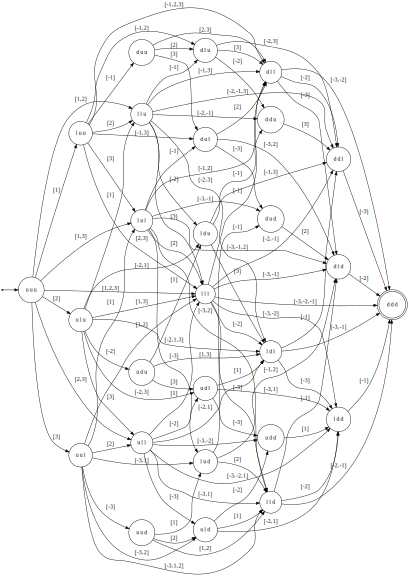

In [5]:
import string
import supFA as sup
import itertools

n = 3
uld = sup.supULD(n)
d = []
state = set()
for j in uld.stateD:
     a = []
     b = ''
     for i in range(n):
            a.append(uld.stateD[j][i+1])
            b = b + a[i] + ' '
     state.add(b)
     d.append(b)

print(state)

for i in range(n):
        a = (i+1)*(-1)
        uld.labels.add(a)  
symbol = set()
temp = []
for i in uld.labels:
    temp.append([i]) 
    
for i in range(len(temp)):
    symbol.add(str(temp[i]))



r = sorted(uld.labels)

for i in range(2,n+1) :
     b = list(itertools.combinations(r,i))
     
    
     for j in range(len(b)):
         temp =[]
         for k in range(len(b[j])) :
            temp.append(b[j][k])
         symbol.add(str(temp))
for i in range(len(b)):
        uld.labels.add(b[i])    

print(symbol)


for k in uld.trans:
    for i in uld.trans[k]:
        for j in uld.trans[k][i]:
            uld.trans[k][i] = {str(d[j]) + ''}
              
trans = {}
for k in uld.trans:
    print(k)
    trans[str(d[k]) + '']  = uld.trans[k]
           
print(trans) 
p = str(d[0]) + ''

new_nfa = VisualNFA(
        states = state,
        input_symbols = symbol,
        transitions = trans,
        initial_state= p,
        final_states= {'d d d '}
        )
            
new_nfa.show_diagram()   




In [1]:

from automata.fa.dfa import DFA
import actLang as al
import initList as iL

def nestedList(List):
     init = {}
     for i in range(len(List)):
       init[i] = [0,0]
       init[i][0] = List[i]
       init[i][1] = [0,0,0]
     return init     
     
a = al.actionSig(3,4)
a.setFluentVals([2,5,1,2])
t = a.mkTranSys()
g = nestedList(t.val)
print(g)

d = []
state = set()
#print(g)
for j in g:
     a = []
     b = ''
     b = b + str(j) + str(g[j][1])
     a.append(g[j][1])
     state.add(b)
     d.append(b)

print(state)
n_nfa = VisualNFA(
      states = state,
      input_symbols ={0,1},
      transitions ={
          '0[0, 0, 0]' : {0 : {'0[0, 0, 0]'}}
      },
      initial_state = '0[0, 0, 0]',
      final_states =  {'15[0, 0, 0]'}
)
    
n_nfa.show_diagram()       
        

Did: a = actionSig(3,4) for 3 actions, 4 fluents
Did: a.setFluentVals([5,2,3,3])
Did: t = a.mkTranSys()
90 states over 4 fluents
fluent i at state q has value = t.val[q][i]
t.val = [[0, 0, 0, 0], [1, 0, 0, 0], [2, 0, 0, 0], [3, 0, 0, 0], [4, 0, 0, 0], [0, 1, 0, 0], [1, 1, 0, 0], [2, 1, 0, 0], [3, 1, 0, 0], [4, 1, 0, 0], [0, 0, 1, 0], [1, 0, 1, 0], [2, 0, 1, 0], [3, 0, 1, 0], [4, 0, 1, 0], [0, 1, 1, 0], [1, 1, 1, 0], [2, 1, 1, 0], [3, 1, 1, 0], [4, 1, 1, 0], [0, 0, 2, 0], [1, 0, 2, 0], [2, 0, 2, 0], [3, 0, 2, 0], [4, 0, 2, 0], [0, 1, 2, 0], [1, 1, 2, 0], [2, 1, 2, 0], [3, 1, 2, 0], [4, 1, 2, 0], [0, 0, 0, 1], [1, 0, 0, 1], [2, 0, 0, 1], [3, 0, 0, 1], [4, 0, 0, 1], [0, 1, 0, 1], [1, 1, 0, 1], [2, 1, 0, 1], [3, 1, 0, 1], [4, 1, 0, 1], [0, 0, 1, 1], [1, 0, 1, 1], [2, 0, 1, 1], [3, 0, 1, 1], [4, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1], [2, 1, 1, 1], [3, 1, 1, 1], [4, 1, 1, 1], [0, 0, 2, 1], [1, 0, 2, 1], [2, 0, 2, 1], [3, 0, 2, 1], [4, 0, 2, 1], [0, 1, 2, 1], [1, 1, 2, 1], [2, 1, 2, 1], [3, 1,

NameError: name 'VisualNFA' is not defined

{0: [[0, 0], [0, 0, 0]], 1: [[1, 0], [0, 0, 0]], 2: [[2, 0], [0, 0, 0]], 3: [[0, 1], [0, 0, 0]], 4: [[1, 1], [0, 0, 0]], 5: [[2, 1], [0, 0, 0]], 6: [[0, 2], [0, 0, 0]], 7: [[1, 2], [0, 0, 0]], 8: [[2, 2], [0, 0, 0]]}
{'7[0, 0, 0]', '6[0, 0, 0]', '2[0, 0, 0]', '3[0, 0, 0]', '1[0, 0, 0]', '4[0, 0, 0]', '0[0, 0, 0]', '5[0, 0, 0]', '8[0, 0, 0]'}
{'[2]', '[-2, -1]', '[-1, 1]', '[-2]', '[1, 2]', '[-1]', '[-2, 1]', '[-1, 2]', '[-2, 2]', '[1]'}
0
2
1
3
7
4
5
8
{'0[0, 0, 0]': {'[1, 2]': {'1[0, 0, 0]'}, '[2]': {'2[0, 0, 0]'}, '[1]': {'3[0, 0, 0]'}}, '2[0, 0, 0]': {'[-2, 1]': {'4[0, 0, 0]'}, '[-2]': {'5[0, 0, 0]'}, '[1]': {'1[0, 0, 0]'}}, '1[0, 0, 0]': {'[-2, -1]': {'6[0, 0, 0]'}, '[-2]': {'4[0, 0, 0]'}, '[-1]': {'7[0, 0, 0]'}}, '3[0, 0, 0]': {'[-1, 2]': {'7[0, 0, 0]'}, '[2]': {'1[0, 0, 0]'}, '[-1]': {'8[0, 0, 0]'}}, '7[0, 0, 0]': {'[-2]': {'6[0, 0, 0]'}}, '4[0, 0, 0]': {'[-1]': {'6[0, 0, 0]'}}, '5[0, 0, 0]': {'[1]': {'4[0, 0, 0]'}}, '8[0, 0, 0]': {'[2]': {'7[0, 0, 0]'}}}


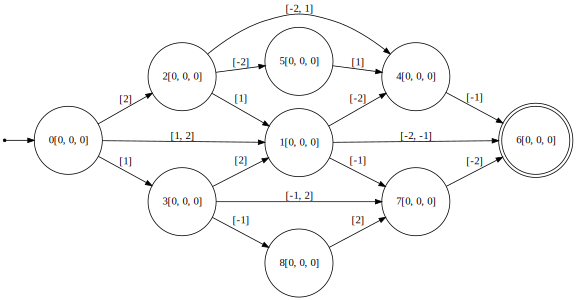

In [7]:
from automata.fa.dfa import DFA
import actLang as al
import initList as iL
import string
import supFA as sup
import itertools

def nestedList(List):
     init = {}
     for i in range(len(List)):
       init[i] = [0,0]
       init[i][0] = List[i]
       init[i][1] = [0,0,0]
     return init     
n = 2     
a = al.actionSig(n,2)
a.setFluentVals([3,3])
t = a.mkTranSys()
g = nestedList(t.val)
print(g)

d = []
state = set()
#print(g)
for j in g:
     a = []
     b = ''
     b = b + str(j) + str(g[j][1])
     a.append(g[j][1])
     state.add(b)
     d.append(b)

print(state)

uld = sup.supULD(n)

for i in range(n):
        a = (i+1)*(-1)
        uld.labels.add(a)  
symbol = set()
temp = []
for i in uld.labels:
    temp.append([i]) 
    
for i in range(len(temp)):
    symbol.add(str(temp[i]))



r = sorted(uld.labels)

for i in range(2,n+1) :
     b = list(itertools.combinations(r,i))
     
    
     for j in range(len(b)):
         temp =[]
         for k in range(len(b[j])) :
            temp.append(b[j][k])
         symbol.add(str(temp))
for i in range(len(b)):
        uld.labels.add(b[i])    

print(symbol)


for k in uld.trans:
    for i in uld.trans[k]:
        for j in uld.trans[k][i]:
            uld.trans[k][i] = {str(d[j]) + ''}
              
trans = {}
for k in uld.trans:
    print(k)
    trans[str(d[k]) + '']  = uld.trans[k]
           
print(trans) 
p = str(d[0]) + ''

n_nfa = VisualNFA(
      states = state,
      input_symbols =symbol,
      transitions = trans,
      initial_state = '0[0, 0, 0]',
      final_states =  {'6[0, 0, 0]'}
)
    
n_nfa.show_diagram()